# Session 5
## Community detection in networks

In [5]:
import networkx as nx
import numpy as np

In [15]:
n = 60
pos = np.random.random((n, 2)) # x and y positions
k = 4 # groups
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = k, n_init = 'auto').fit(pos)
leaders = clustering.cluster_centers_
groups = clustering.labels_

Kmeans : puts k amount of random flags and clusters the points according to its distance with different flags

In [16]:
G = nx.Graph()

for point in range(n):
  coords = pos[point,:]
  G.add_node(point, pos = coords)

i = 0
for center in leaders:
  G.add_node(f'C{i}', pos = center)
  i += 1

In [17]:
import seaborn as sns
colors = sns.color_palette('husl', k)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727)]

In [18]:
ca = []
for v in G.nodes():
  if 'C' not in str(v):
    ca.append(colors[groups[v]]) # points
  else:
    ca.append(colors[int(v[1:])]) # centers

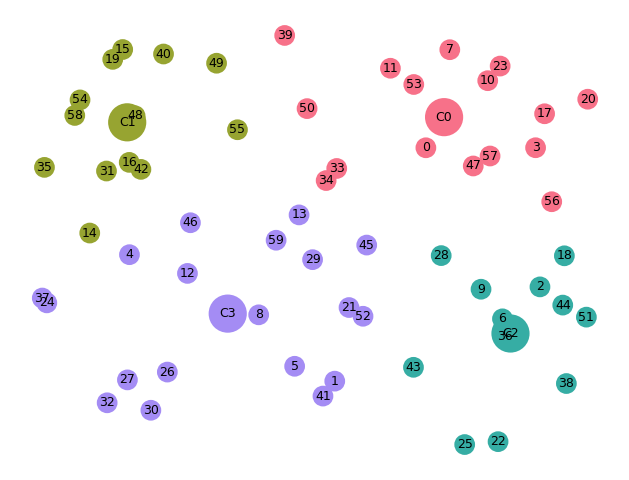

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')

sizes = [80] * n + [300] * k

nx.draw(G, coords, node_color = ca, node_size = sizes)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

In [11]:
G2 = nx.connected_watts_strogatz_graph(80, 5, 0.2)
clusters = nx.community.greedy_modularity_communities(G2)
for c in clusters:
  print(c)

frozenset({64, 65, 37, 38, 39, 40, 41, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63})
frozenset({32, 33, 34, 35, 36, 24, 25, 26, 27, 28, 29, 30, 31})
frozenset({42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52})
frozenset({66, 67, 68, 69, 70, 71, 72, 73, 74})
frozenset({16, 17, 10, 11, 12, 13, 14, 15})
frozenset({0, 1, 2, 75, 76, 77, 78, 79})
frozenset({3, 4, 5, 6, 7, 8, 9})
frozenset({18, 19, 20, 21, 22, 23})


In [12]:
cc = sns.color_palette('hls', len(clusters))
cv = []
i = 0
for cluster in clusters:
  color = cc[i]
  for v in cluster:
    cv.append(cc[i])
  i += 1

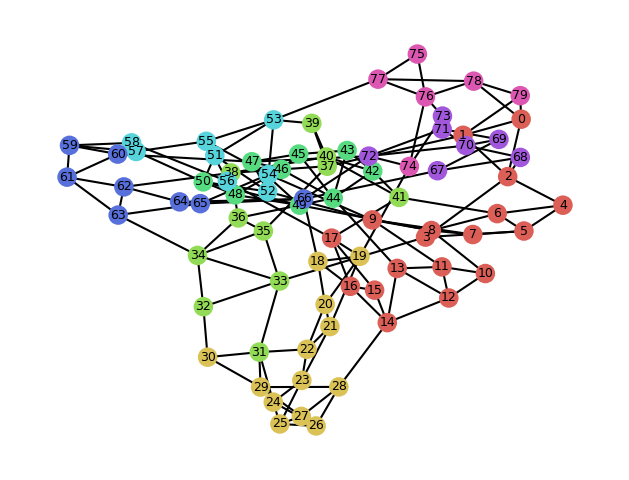

In [13]:
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color = cv, node_size = 70)
l = nx.draw_networkx_labels(G2, pos, font_size = 6)

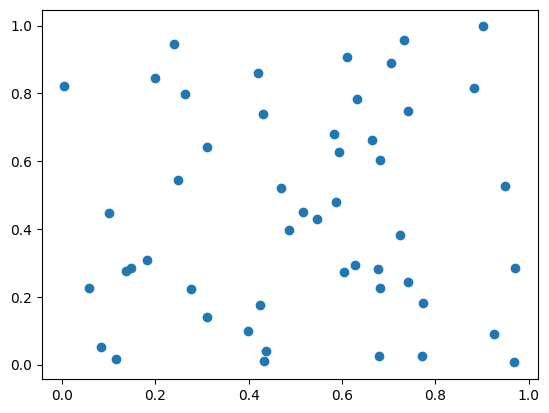

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generating random data
x = np.random.rand(50)
y = np.random.rand(50)

# Creating the scatter plot
plt.scatter(x, y)
plt.show()

In [22]:
pip install seaborn


<Axes: >

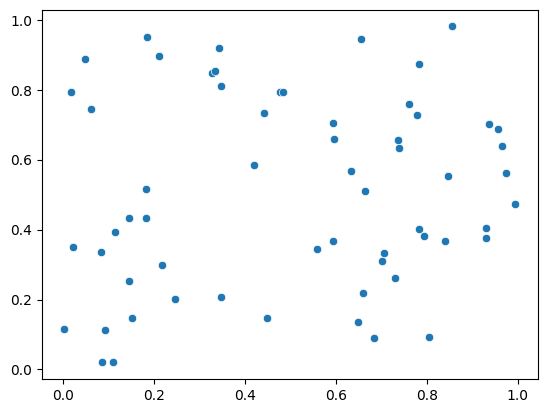

In [25]:
import seaborn as sns
import numpy as np

# Generating random data
x = np.random.rand(60)
y = np.random.rand(60)

# Creating the scatter plot using Seaborn
sns.scatterplot(x=x, y=y)

In [32]:
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [33]:
# Combine x and y into a single dataset
data = np.column_stack((x, y))

In [36]:
# Define the number of clusters (K)
k = 4

# Initialize and fit the k-means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the cluster assignments
cluster_assignments = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


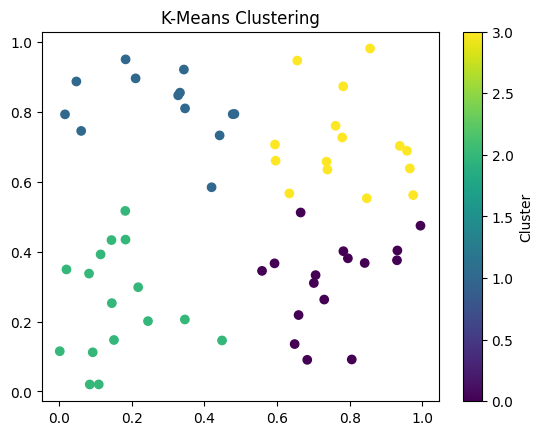

In [38]:
# Create the scatter plot
plt.scatter(x, y, c=cluster_assignments, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering')
plt.show()

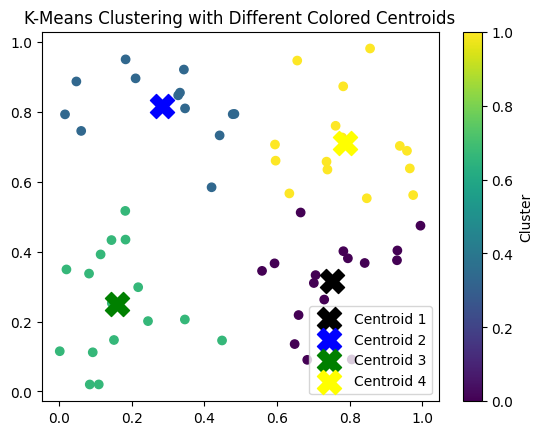

In [48]:
# Scatter plot of the data points with cluster assignments
plt.scatter(x, y, c=cluster_assignments, cmap='viridis')

# Define a list of colors for the centroids
centroid_colors = ['black', 'blue', 'green','yellow']

# Plot the cluster centers with different colors
for i, (center_x, center_y) in enumerate(kmeans.cluster_centers_):
    plt.scatter(center_x, center_y, s=300, c=centroid_colors[i], marker='X', label=f'Centroid {i+1}')

plt.colorbar(label='Cluster')
plt.title('K-Means Clustering with Different Colored Centroids')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-58-b11c5ce0df31>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color)  # plot the data points for each cluster


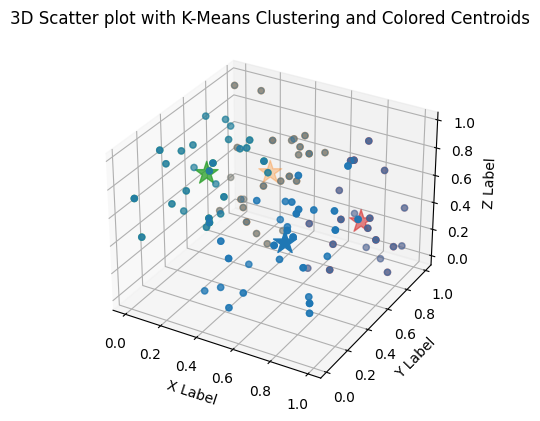

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns

# Generating random 3D data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Creating a 3D scatter plot using Seaborn
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Combining the three dimensions into a single dataset
data_3d = np.column_stack((x, y, z))

# Running K-Means clustering
kmeans_3d = KMeans(n_clusters=4)

kmeans_3d.fit(data_3d)
cluster_assignments_3d = kmeans_3d.labels_

# Plotting the clusters along with their centers
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):  # using the tab10 palette with 4 colors
    cluster_points = data_3d[cluster_assignments_3d == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color)  # plot the data points for each cluster

ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], s=300, c=sns.color_palette('tab10', n_colors=4), marker='*', label='Centroids')  # plot the cluster centers with the same colors as the clusters

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter plot with K-Means Clustering and Colored Centroids')

plt.show()